In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf



In [4]:
import lxml
from io import StringIO
import requests

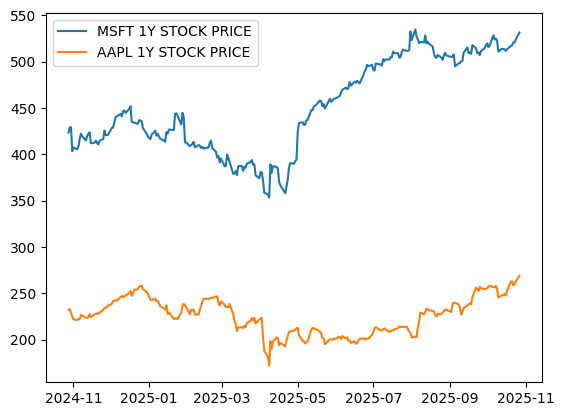

In [5]:
tic1 = yf.Ticker("MSFT")
tic2 = yf.Ticker("AAPL")
# ticLis1 = yf.Tickers()
dat1 = tic1.history(period = "1Y")
dat2 = tic2.history(period = "1Y")


fig,axes = plt.subplots()
axes.plot(dat1.index, dat1['Close'], label=f"MSFT 1Y STOCK PRICE")
axes.plot(dat2.index, dat2['Close'], label=f"AAPL 1Y STOCK PRICE")
axes.legend()


# axes = dat['Close'].plot(title = f"{tic} STOCK PRICE 1Y", figsize = (12,12))
# plt.show()

In [6]:
dat1

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-10-28 00:00:00-04:00,428.443483,428.721395,423.123407,423.411255,14882400,0.0,0.0
2024-10-29 00:00:00-04:00,424.810714,429.942203,422.627096,428.731293,17644100,0.0,0.0
2024-10-30 00:00:00-04:00,434.180362,435.232461,428.880157,429.306946,29749100,0.0,0.0
2024-10-31 00:00:00-04:00,412.264924,413.058981,403.272437,403.322083,53971000,0.0,0.0
2024-11-01 00:00:00-04:00,405.962222,412.403851,404.463464,407.312073,24230400,0.0,0.0
...,...,...,...,...,...,...,...
2025-10-21 00:00:00-04:00,517.500000,518.690002,513.039978,517.659973,15586200,0.0,0.0
2025-10-22 00:00:00-04:00,521.150024,525.229980,517.710022,520.539978,18962700,0.0,0.0
2025-10-23 00:00:00-04:00,522.460022,523.950012,518.609985,520.559998,14023500,0.0,0.0


In [13]:
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})


html_content = StringIO(response.text)
wiki_dfs = pd.read_html(html_content)
wiki_df1 = wiki_dfs[0]
wiki_df_symbols = wiki_df1['Symbol'].apply(lambda x:x.lower())
firstFive = list(wiki_df_symbols)[:20]
firstFiveStr = " ".join(firstFive)
wiki_df1


,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


[*********************100%***********************]  20 of 20 completed


<Axes: xlabel='Date'>

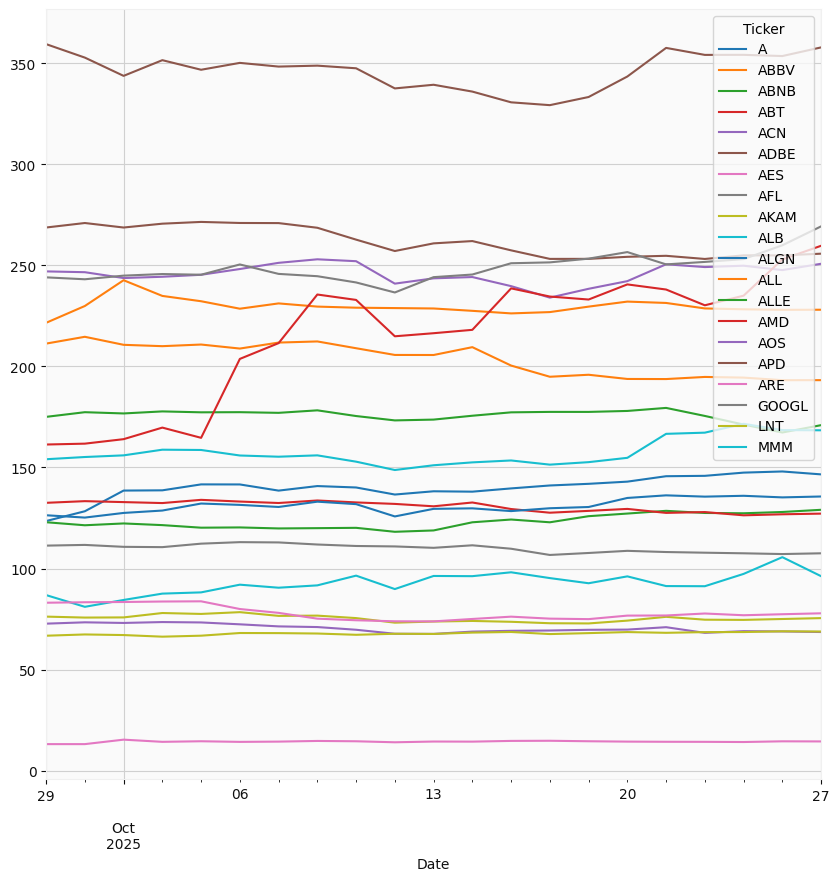

In [12]:

ticLis1 = yf.Tickers(firstFiveStr)
datLis1 = ticLis1.history(period = "1mo")
datLis1['Close'].plot(figsize=(10,10))

In [9]:
import mplfinance as mpf

In [10]:
# Download data
data = yf.download("AAPL", start="2024-01-01", end="2024-03-01")

aapl_data = data.xs('AAPL', level=1, axis=1)




C:\Users\harshit\AppData\Local\Temp\ipykernel_39584\1093983553.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2024-01-01", end="2024-03-01")
[*********************100%***********************]  1 of 1 completed


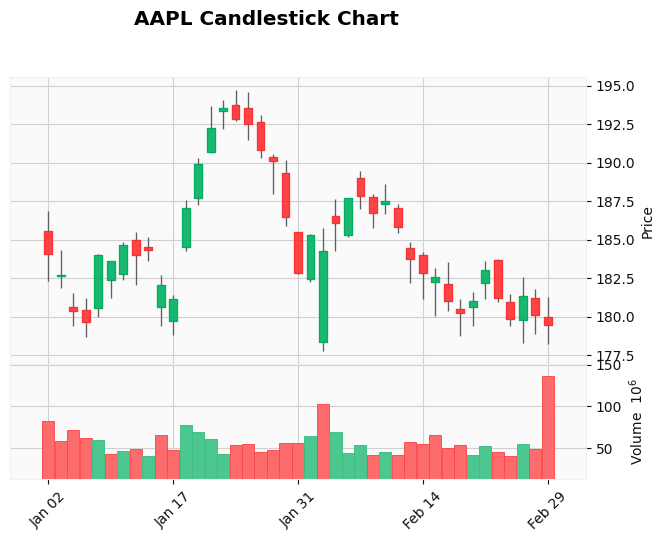

In [11]:
# Plot candlestick chart
mpf.plot(aapl_data, type='candle', style='yahoo', volume=True, title="AAPL Candlestick Chart")